In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def read_csv_files():
    data = []
    for root, dirs, files in os.walk('results'):
        for file in files:
            if file.endswith("locust_results_stats.csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                parts = root.split(os.sep)
                if len(parts) >= 3:
                    environment = parts[-3]
                    cache_status = parts[-2]
                    user_count = parts[-1]
                    df['Ambiente'] = environment
                    df['StatusCache'] = cache_status
                    df['ContagemUsuarios'] = user_count
                    data.append(df)
                else:
                    print(f"Pular arquivo {file_path} devido à estrutura de caminho inesperada.")
    return pd.concat(data, ignore_index=True)

In [8]:
def generate_plots(df):
    # Converter ContagemUsuarios para numérico
    df['ContagemUsuarios'] = pd.to_numeric(df['ContagemUsuarios'])

    # Gráfico de Tempo Médio de Resposta por Contagem de Usuários
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='ContagemUsuarios', y='Average Response Time', hue='Ambiente', style='StatusCache', markers=True, dashes=False)
    plt.title('Tempo Médio de Resposta por Contagem de Usuários')
    plt.xlabel('Número de Usuários')
    plt.ylabel('Tempo Médio de Resposta (ms)')
    plt.legend(title='Ambiente / Status do Cache')
    plt.grid(True)
    plt.show()

    # Gráfico de Requisições por Segundo por Contagem de Usuários
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='ContagemUsuarios', y='Requests/s', hue='Ambiente', style='StatusCache', markers=True, dashes=False)
    plt.title('Requisições por Segundo por Contagem de Usuários')
    plt.xlabel('Número de Usuários')
    plt.ylabel('Requisições por Segundo')
    plt.legend(title='Ambiente / Status do Cache')
    plt.grid(True)
    plt.show()

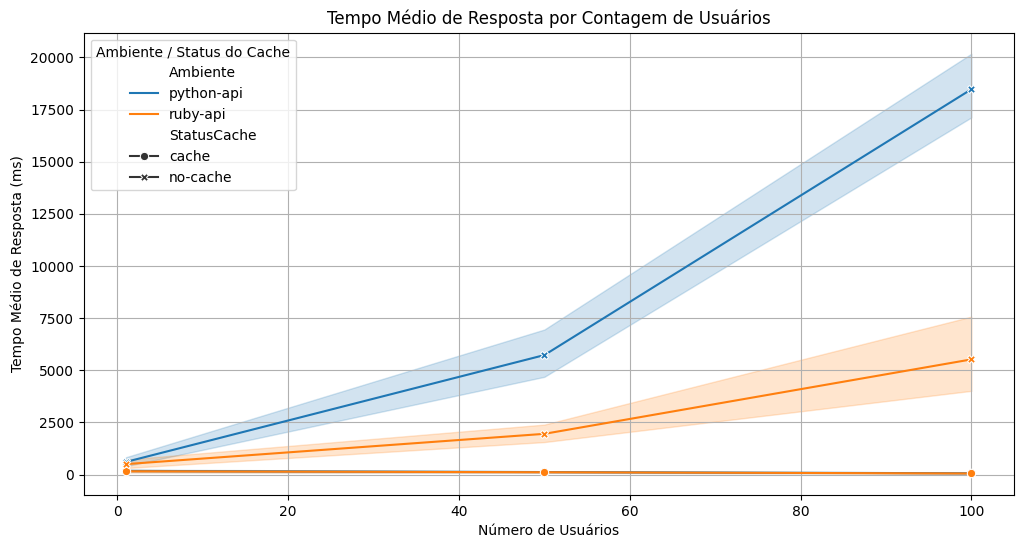

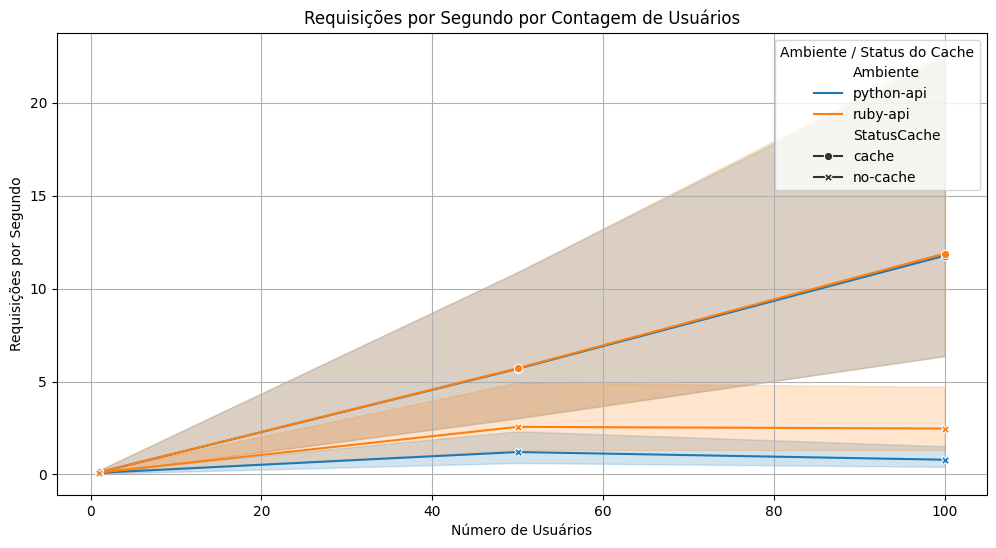

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,90%,95%,98%,99%,99.9%,99.99%,100%,Ambiente,StatusCache,ContagemUsuarios
0,GET,/?url=https%3A%2F%2Fg1.globo.com%2F,5,0,22.000000,120.133167,17.733930,517.383611,69322.000000,0.086179,...,520,520,520,520,520,520,520,python-api,cache,1
1,GET,/?url=https%3A%2F%2Fnews.yahoo.com%2F,3,0,19.000000,392.427272,16.924629,1141.468833,46314.000000,0.051707,...,1100,1100,1100,1100,1100,1100,1100,python-api,cache,1
2,GET,/?url=https%3A%2F%2Fwww.bbc.com%2Fportuguese,2,0,18.224968,95.483231,18.224968,172.741494,20710.000000,0.034472,...,170,170,170,170,170,170,170,python-api,cache,1
3,GET,/?url=https%3A%2F%2Fwww.estadao.com.br%2F,2,0,18.019105,206.674780,18.019105,395.330455,66808.000000,0.034472,...,400,400,400,400,400,400,400,python-api,cache,1
4,GET,/?url=https%3A%2F%2Fwww.folha.uol.com.br%2F,3,0,22.000000,138.480082,19.080305,374.375621,93943.000000,0.051707,...,370,370,370,370,370,370,370,python-api,cache,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,GET,/?url=https%3A%2F%2Fwww.globo.com%2F,90,0,1800.000000,3184.276242,524.959618,11728.363257,47932.000000,1.522016,...,8800,9700,11000,12000,12000,12000,12000,ruby-api,no-cache,50
126,GET,/?url=https%3A%2F%2Fwww.r7.com%2F,85,0,810.000000,1236.514415,167.695253,5277.308121,28891.000000,1.437460,...,2800,3400,4800,5300,5300,5300,5300,ruby-api,no-cache,50
127,GET,/?url=https%3A%2F%2Fwww.terra.com.br%2Fnoticia...,80,0,1200.000000,1528.494366,756.945975,6906.728435,79530.500000,1.352903,...,2200,3400,5700,6900,6900,6900,6900,ruby-api,no-cache,50
128,GET,/?url=https%3A%2F%2Fwww.uol.com.br%2F,99,0,970.000000,1828.638927,120.838997,6624.734584,80200.000000,1.674218,...,4500,5300,6500,6600,6600,6600,6600,ruby-api,no-cache,50


In [ ]:
df = read_csv_files()
generate_plots(df)